<a href="https://colab.research.google.com/github/akanshgupta98/machine-learning/blob/Deep-Learning-technique/Heart_disease_prediction(_using_perceptron_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Dataset from drive to colab

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title processedheart.csv, id 1EHKw30UQU9Qu7uSjy5nUiViwahp7oG2z
title new_emotion (2).csv, id 1cb7WbuJxty8DgSQekm-OlpZvjCs-LLyl


In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1EHKw30UQU9Qu7uSjy5nUiViwahp7oG2z'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('heart_dataset.csv')

In [0]:
!ls

adc.json  heart_dataset.csv  sample_data


#Loading Dataset

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv('heart_dataset.csv',names='age sex cp trestbps chol fbs restecg thalac exang oldpeak slope nmaj thal output'.split())

In [0]:
#making a copy of dataset.
dataset=pd.read_csv('heart_dataset.csv',names='age sex cp trestbps chol fbs restecg thalac exang oldpeak slope nmaj thal output'.split())

# Preprocessing

In [0]:
#visualising the dataset for encoding.
dataset.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,output
sex,,,,,,,,,,,
0,55.721649,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,0.867010,1.567010,0.536082
1,53.834951,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.120874,1.616505,1.126214


In [0]:

dataset.groupby('thal').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,output
thal,,,,,,,,,,,,
3,53.379518,0.518072,2.927711,129.506024,246.831325,0.120482,0.963855,155.698795,0.186747,0.682530,1.433735,0.373494
6,56.666667,0.944444,3.333333,136.944444,227.000000,0.277778,1.166667,135.111111,0.444444,1.522222,2.055556,1.444444
7,55.632479,0.871795,3.452991,134.042735,250.153846,0.162393,1.000000,143.435897,0.504274,1.481197,1.769231,1.658120
?,52.500000,0.500000,3.500000,128.000000,210.000000,0.500000,1.000000,135.500000,0.500000,0.500000,1.500000,1.000000


In [0]:
dataset.groupby('nmaj').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,output
nmaj,,,,,,,,,,,,
0,51.693182,0.630682,2.982955,130.954545,243.051136,0.113636,0.897727,155.022727,0.250000,0.831818,1.562500,0.454545
1,57.476923,0.769231,3.307692,129.630769,248.123077,0.138462,1.092308,141.092308,0.461538,1.013846,1.600000,1.276923
2,59.789474,0.657895,3.473684,135.710526,254.447368,0.263158,1.105263,146.210526,0.447368,1.707895,1.657895,1.947368
3,59.900000,0.800000,3.650000,136.900000,265.450000,0.250000,1.350000,134.550000,0.350000,1.865000,1.850000,2.300000
?,47.750000,1.000000,3.000000,133.250000,216.250000,0.250000,0.500000,157.250000,0.250000,0.125000,1.500000,0.250000


In [0]:
dataset.groupby('cp').mean()

,age,sex,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,output
cp,,,,,,,,,,,
1,55.869565,0.826087,140.869565,237.130435,0.217391,1.217391,155.956522,0.173913,1.391304,1.739130,0.478261
2,51.360000,0.640000,128.400000,244.780000,0.100000,0.760000,162.420000,0.080000,0.316000,1.320000,0.280000
3,53.697674,0.593023,130.290698,243.965116,0.197674,0.848837,155.406977,0.127907,0.806977,1.500000,0.383721
4,55.722222,0.722222,132.201389,250.513889,0.125000,1.118056,140.680556,0.555556,1.373611,1.736111,1.569444


In [0]:
dataset.groupby('slope').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,output
slope,,,,,,,,,,,
1,52.661972,0.669014,2.964789,130.133803,245.633803,0.140845,0.845070,160.471831,0.183099,0.408451,0.408451
2,56.100000,0.678571,3.357143,132.100000,249.121429,0.135714,1.107143,139.292857,0.457143,1.428571,1.392857
3,55.380952,0.761905,3.142857,139.476190,237.666667,0.285714,1.190476,144.904762,0.428571,2.714286,1.476190


In [0]:
data=pd.DataFrame(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalac      303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
nmaj        303 non-null object
thal        303 non-null object
output      303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,nmaj,thal,output
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [0]:
#for finding null values.
data.isin(['?']).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalac      0
exang       0
oldpeak     0
slope       0
nmaj        4
thal        2
output      0
dtype: int64

In [0]:
#changing the blank values of thal and nmaj according to the data seen above.
for i in range(0,data.shape[0]):
  if(data['thal'][i]=='?'):
    data['thal'][i]= 6
  if(data['nmaj'][i]=='?'):
    data['nmaj'][i]= 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
#as in info it was seen that the dtype is object for these 2 attributes.
data['thal']=data['thal'].astype(float)
data['nmaj']=data['nmaj'].astype(float)

In [0]:
#encoding the categorical values according to the data explored above.
for i in range(0,data.shape[0]):
  if(data['thal'][i] == 6):
    data['thal'][i] = 2
  elif(data['thal'][i] == 7):
    data['thal'][i] = 1
  elif(data['thal'][i] == 3):
    data['thal'][i] = 0

  if(data['cp'][i] == 1):
    data['cp'][i] = 3
  elif(data['cp'][i] == 4):
    data['cp'][i] = 2
  elif(data['cp'][i] == 3):
    data['cp'][i] = 1
  elif(data['cp'][i] == 2):
    data['cp'][i] = 0 
  
  if(data['slope'][i] == 3):
    data['slope'][i] = 1
  elif(data['slope'][i] == 1):
    data['slope'][i] = 0 
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [0]:
#confirmation that the above code worked as intended.
data.groupby('thal').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,nmaj,output
thal,,,,,,,,,,,,,
0.0,53.379518,0.518072,1.240964,129.506024,246.831325,0.120482,0.963855,155.698795,0.186747,0.682530,0.722892,0.487952,0.373494
1.0,55.632479,0.871795,1.726496,134.042735,250.153846,0.162393,1.000000,143.435897,0.504274,1.481197,1.282051,0.974359,1.658120
2.0,56.250000,0.900000,1.750000,136.050000,225.300000,0.300000,1.150000,135.150000,0.450000,1.420000,1.550000,0.900000,1.400000


In [0]:
data.groupby('cp').mean()

,age,sex,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,nmaj,thal,output
cp,,,,,,,,,,,,,
0,51.360000,0.640000,128.400000,244.780000,0.100000,0.760000,162.420000,0.080000,0.316000,0.520000,0.400000,0.260000,0.280000
1,53.697674,0.593023,130.290698,243.965116,0.197674,0.848837,155.406977,0.127907,0.806977,0.825581,0.523256,0.325581,0.383721
2,55.722222,0.722222,132.201389,250.513889,0.125000,1.118056,140.680556,0.555556,1.373611,1.243056,0.951389,0.722222,1.569444
3,55.869565,0.826087,140.869565,237.130435,0.217391,1.217391,155.956522,0.173913,1.391304,1.086957,0.478261,0.521739,0.478261


In [0]:
data.groupby('slope').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,nmaj,thal,output
slope,,,,,,,,,,,,,
0,52.661972,0.669014,1.218310,130.133803,245.633803,0.140845,0.845070,160.471831,0.183099,0.408451,0.556338,0.302817,0.408451
1,55.380952,0.761905,1.714286,139.476190,237.666667,0.285714,1.190476,144.904762,0.428571,2.714286,0.571429,0.761905,1.476190
2,56.100000,0.678571,1.671429,132.100000,249.121429,0.135714,1.107143,139.292857,0.457143,1.428571,0.871429,0.700000,1.392857


In [0]:
#tried the encoder of sklearn and compared with manual encoding. results had no huge difference.
# encoder = LabelEncoder()
# data['cp'] =  encoder.fit_transform(data['cp'])
# data['slope'] =  encoder.fit_transform(data['slope'])
# data['thal'] =  encoder.fit_transform(data['thal'])
# data['nmaj'] =  encoder.fit_transform(data['nmaj'])
# data.head(10)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalac      303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
nmaj        303 non-null float64
thal        303 non-null float64
output      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [0]:
data.shape

(303, 14)

In [0]:
# now splitting the data into x and y.
x=data.drop('output',axis=1)

In [0]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalac      303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
nmaj        303 non-null float64
thal        303 non-null float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [0]:
y=data['output']

In [0]:
data.groupby('output').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,nmaj,thal
output,,,,,,,,,,,,,
0,52.585366,0.560976,0.512195,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,0.597561,3.810976,0.256098
1,55.381818,0.836364,0.254545,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.127273,5.345455,0.654545
2,58.027778,0.805556,0.138889,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.444444,6.027778,1.000000
3,56.000000,0.800000,0.114286,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.371429,6.285714,0.857143
4,59.692308,0.846154,0.153846,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,1.538462,6.230769,1.000000


In [0]:
#mapping the results of 5 categories into binary.
y=data['output'].map(lambda i:1 if i>1 else 0)

In [0]:
y

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    0
302    0
Name: output, Length: 303, dtype: int64

# train-test-split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#splitting the data into train test split sets.
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

In [0]:
x_train.shape

(227, 13)

In [0]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 184 to 6
Data columns (total 13 columns):
age         227 non-null int64
sex         227 non-null int64
cp          227 non-null int64
trestbps    227 non-null int64
chol        227 non-null int64
fbs         227 non-null int64
restecg     227 non-null int64
thalac      227 non-null int64
exang       227 non-null int64
oldpeak     227 non-null float64
slope       227 non-null int64
nmaj        227 non-null float64
thal        227 non-null float64
dtypes: float64(3), int64(10)
memory usage: 24.8 KB


In [0]:
#just trying to see if standardisation made any difference. the results were degrading. 
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# x_train[:, [0,3,4,7,9]] = sc_x.fit_transform(x_train[:, [0,3,4,7,9]])
# x_test[:, [0,3,4,7,9]] = sc_x.transform(x_test[:, [0,3,4,7,9]])

# Perceptron model

Model Used:

$y = 1, \mbox{if} \sum_i w_i*x_i >= b$

$y = 0, \mbox{otherwise}$




In [0]:
import matplotlib.pyplot as plt

In [0]:
#made the perceptron training model. 
#2 hyper parameters used. i.e. Learning rate and epochs.
class Perceptron:
  def __init__(self):
    self.w=None
    self.b=None
  def model(self,x):
    if( np.dot(self.w,x) >= self.b ):
      return 1
    else:
      return 0
  def predict(self,x):
    y_pred=[]
    for i in x:
      y_pred.append(self.model(i))
    return np.array(y_pred)
  def fit(self,x,y, epochs = 1, lr = 1):
    self.w=np.ones(x.shape[1])
    self.b=0
    w_mat=[]
    accuracy={}
    max_accuracy=0
    for k in range(0,epochs):
      for i,j in zip(x,y):
        y_pred=self.model(i)
        if( y_pred == 0 and j == 1 ):
          self.w = self.w + lr * i
          self.b = self.b + lr * 1
        elif( y_pred == 1 and j == 0 ):
          self.w = self.w - lr * i
          self.b = self.b - lr * 1
      w_mat.append(self.w)
      accuracy[k]=accuracy_score(self.predict(x),y)
      if(accuracy[k]>max_accuracy):
        max_accuracy=accuracy[k]
        chkpt_w=self.w
        chkpt_b=self.b
    self.w=chkpt_w
    self.b=chkpt_b
    print('maximum accuracy is: ',max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()
    return w_mat

In [0]:
perceptron = Perceptron()

maximum accuracy is:  0.8502202643171806


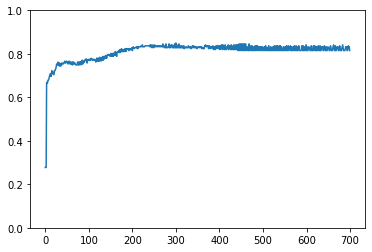

In [0]:
# x_train=x_train.values
# y_train=y_train.values
w_mat=perceptron.fit(x_train,y_train,700,0.00001)

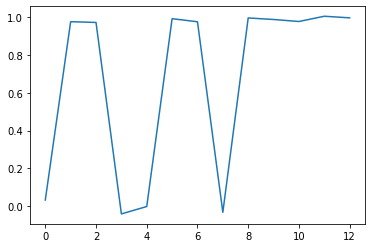

In [0]:
plt.plot(perceptron.w)
plt.show()

# Accuracy Obtained

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
#train accuracy obtained.
y_pred=perceptron.predict(x_train)
print(accuracy_score(y_pred,y_train))

0.8502202643171806


In [0]:
#test accuracy obtained.
# x_test=x_test.values
# y_test=y_test.values
y_pred=perceptron.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.868421052631579


# Practical Use

In [0]:
x_test=pd.DataFrame(x_test)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,56.0,1.0,3.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,1.0
1,63.0,1.0,2.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,1.0
2,54.0,1.0,2.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,0.0,0.0,0.0
3,57.0,1.0,2.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,1.0
4,60.0,0.0,1.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# This is just an example. it can be made to be entered by user and for values not entered, 0 can be assigned as would have no effect on threshold.
x_test_model=np.array([[56,0,3,150,254,1,2,1.9,0,0,0,0,1]])
print(x_test_model.shape)
x_test_model=pd.DataFrame(x_test_model)
x_test_model.head()

    


(1, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,56.0,0.0,3.0,150.0,254.0,1.0,2.0,1.9,0.0,0.0,0.0,0.0,1.0


In [0]:
# test accuracy obtained.
x_test_model=x_test_model.values

#y_test=y_test.values
y_pred = perceptron.predict( x_test_model )
if( y_pred == 1):
  print("Based on the values, there is a chance of heart disease.\n you need to make changes to your lifestlye")
if( y_pred == 0):
  print("Based on the values, there is not a chance of heart disease.\n")

Based on the values, there is a chance of heart disease.
 you need to make changes to your lifestlye
